import os
import shutil
from sklearn.model_selection import train_test_split

In [105]:
import numpy as np
import cv2
import os
import torch
from sklearn.model_selection import train_test_split
import pandas as pd
from PIL import Image
import cv2



In [106]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm.auto import tqdm
import os

In [107]:
# Check for GPU
#device = "cuda" if torch.cuda.is_available() else "cpu"

# Check for GPU in mac
device = "mps" if torch.backends.mps.is_available() else "cpu"

device

'mps'

In [72]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Assuming df is your DataFrame and has a column 'Impairment_Type' and 'Image_Path'
train, test = train_test_split(df, test_size=0.8, stratify=df['Impairment_Type'])

# Let's create directories for training and testing images
base_dir = '/Users/selahmitchell/Downloads/alzheimer detection'
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')

# Create directories if they don't exist
for directory in [train_dir, test_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Move images into respective directories (class-based folders)
for label in train['Impairment_Type'].unique():
    label_train_dir = os.path.join(train_dir, label)
    if not os.path.exists(label_train_dir):
        os.makedirs(label_train_dir)

for label in test['Impairment_Type'].unique():
    label_test_dir = os.path.join(test_dir, label)
    if not os.path.exists(label_test_dir):
        os.makedirs(label_test_dir)

# Move images for the training set
for i, row in train.iterrows():
    shutil.copy(row['Image_Path'], os.path.join(train_dir, row['Impairment_Type'], row['Image_Name']))

# Move images for the test set
for i, row in test.iterrows():
    shutil.copy(row['Image_Path'], os.path.join(test_dir, row['Impairment_Type'], row['Image_Name']))


In [73]:
from torchvision import transforms

data_transforms = {

    'Training' : transforms.Compose([
        transforms.RandomResizedCrop((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]),
    'Testing': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()

    ])
}


In [74]:
from torchvision import datasets
import torch
from torch.utils.data import DataLoader

image_datasets = {
    'Training': datasets.ImageFolder(os.path.join(base_dir, 'Training'), data_transforms['Training']),
    'Testing': datasets.ImageFolder(os.path.join(base_dir, 'Testing'), data_transforms['Testing']),
}

dataloaders = {
    'Training': DataLoader(image_datasets['Training'], batch_size=32, shuffle=True),
    'Testing': DataLoader(image_datasets['Testing'], batch_size=32, shuffle=False),
}

dataset_sizes = {
    'Training': len(image_datasets['Training']),
    'Testing': len(image_datasets['Testing']),
}

class_names = image_datasets['Training'].classes


In [76]:
print(f"Dataset sizes: {dataset_sizes}")
print(f"Class names: {class_names}")


Dataset sizes: {'Training': 3530, 'Testing': 9390}
Class names: ['Mild Impairment', 'Moderate Impairment', 'No Impairment', 'Very Mild Impairment']


/var/folders/q2/p4k6j1ss1qd27364rjxv2fxh0000gn/T/ipykernel_3738/2123115336.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 8, i+1)


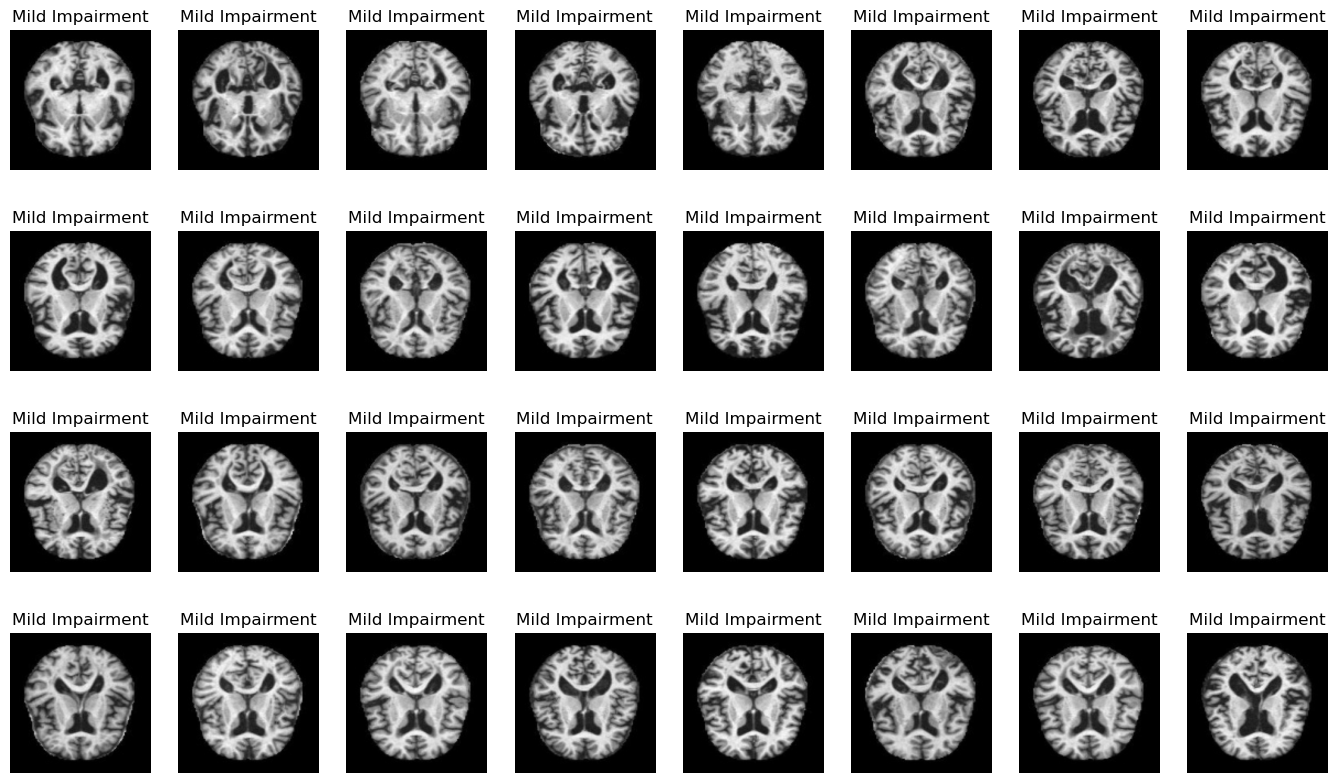

In [102]:
samples, labels = next(iter(dataloaders['Testing']))
plt.figure(figsize=(17, 10))
plt.axis('off')
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(samples[i].permute(1, 2, 0))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1953 entries, 8641 to 2865
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Impairment_Type  1953 non-null   object
 1   Image_Name       1953 non-null   object
 2   Image_Path       1953 non-null   object
 3   Image_Data       1953 non-null   object
dtypes: object(4)
memory usage: 76.3+ KB


In [104]:

from torchvision import models
from torchvision.models import ResNet50_Weights

# Load the model with pre-trained weights
model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

# Freeze all the layers
for param in model.parameters():
        param.requires_grad = False
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [81]:
import torch.nn as nn
from torchvision import models

# Load the pre-trained ResNet50 model
model = models.resnet50(weights='IMAGENET1K_V1')

# Get the number of input features to the original fully connected layer

in_features = model.fc.in_features

# Modify the fully connected layer (fc)
model.fc = nn.Sequential(
    nn.Linear(in_features, 2048),
    nn.SELU(),
    nn.Dropout(p=0.4),
    nn.Linear(2048, 2048),
    nn.SELU(),
    nn.Dropout(p=0.4),
    nn.Linear(2048, 4),
    nn.LogSigmoid()
)
# Move the model to the appropriate device (e.g., 'cuda' or 'cpu')
model = model.to(device)


In [82]:
for name, child in model.named_children():
  for name2, params in child.named_parameters():
    params.requires_grad = True

In [83]:
criterion = nn.CrossEntropyLoss()

In [84]:

optimizer = optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.999))

In [85]:
EPOCH = 30

/opt/homebrew/Caskroom/miniconda/base/envs/ds4003/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ds4003/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [86]:
# you can have other things like learning rate scheduler and ...
from torch.optim import lr_scheduler

# def step_scheduler(epoch):
#     if epoch < EPOCH * 0.5:
#         factor = 1
#     elif EPOCH * 0.5 <= epoch < EPOCH * 0.8:
#         factor = 0.1
#     else:
#         factor = 0.01
#     return factor

# scheduler = lr_scheduler.LambdaLR(optimizer, step_scheduler)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [87]:
### START CODE HERE
losses = []

# for training part you have to set model to train mode
model.train()

# loop on epochs
for e in tqdm(range(EPOCH)):
# loop on batches
  for inputs, labels in dataloaders['Training']:
    # print("*", end=" ")
    
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    # set the grad to zero
    optimizer.zero_grad()
    
    # hint: using of pytorch max method (https://pytorch.org/docs/stable/generated/torch.max.html)
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)

    #  compute loss
    loss = criterion(outputs, labels)
    
    # backward part
    loss.backward()

    # update parameters
    optimizer.step()

exp_lr_scheduler.step()
  # you have to append loss for each epoch
losses.append(loss)
### END CODE HERE

  0%|          | 0/30 [00:00<?, ?it/s]

In [71]:
### START CODE HERE

losses = []

# for training part you have to set model to train mode
model.train()

# loop on epochs
for e in tqdm(range(EPOCH)):
# loop on batches
    for inputs, labels in dataloaders['Training']:
    # print("*", end=" ")

        inputs = inputs.to(device)
        labels = labels.to(device)

    # set the grad to zero
    optimizer.zero_grad()
    
    # forward part
    # hint: using of pytorch max method (https://pytorch.org/docs/stable/generated/torch.max.html)
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)

    #  compute loss
    loss = criterion(outputs, labels)

    
    # backward part
    loss.backward()

    # update parameters
    optimizer.step()

exp_lr_scheduler.step()
# you have to append loss for each epoch
losses.append(loss)
### END CODE HERE

  0%|          | 0/30 [00:00<?, ?it/s]

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [98]:
dataloaders['Training']

In [95]:
# Initialize list to store epoch losses
epoch_losses = []

# Set model to training mode
model.train()

# Loop over epochs
for e in tqdm(range(EPOCH)):
    running_loss = 0.0  # To accumulate loss for each epoch
    
    # Loop over batches in the training data
    for inputs, labels in dataloaders['Training']:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Set gradients to zero
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass (compute gradients)
        loss.backward()

        # Update model parameters
        optimizer.step()

        # Accumulate the loss for this batch
        running_loss += loss.item()

    # Average loss for the epoch
    avg_epoch_loss = running_loss / len(dataloaders['Training']) kj;c 
    
    # Append the average loss for this epoch
    epoch_losses.append(avg_epoch_loss)

    # Optionally, update the learning rate scheduler
    exp_lr_scheduler.step()

# Print or plot the epoch losses
print(epoch_losses)


  0%|          | 0/30 [00:00<?, ?it/s]

[1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992, 1.3862943649291992]


In [99]:
for name, param in model.named_parameters():
    if param.grad is not None:
        print(f"Gradients for {name}: {param.grad}")

Gradients for conv1.weight: tensor([[[[ 3.4410e-23,  1.9684e-23,  1.0134e-23,  ..., -3.9726e-25,
           -6.9048e-24, -7.0618e-24],
          [ 1.2206e-23,  1.1496e-24, -8.6649e-24,  ..., -1.6780e-23,
           -2.2959e-23, -2.7035e-23],
          [ 5.6755e-24, -9.2626e-24, -2.0577e-23,  ..., -3.8477e-23,
           -4.2080e-23, -4.6596e-23],
          ...,
          [-2.1363e-23, -3.5312e-23, -4.7966e-23,  ..., -6.9428e-23,
           -6.7844e-23, -7.1129e-23],
          [-4.6486e-23, -6.3152e-23, -7.4495e-23,  ..., -9.5931e-23,
           -9.1077e-23, -9.0282e-23],
          [-6.9033e-23, -8.7671e-23, -9.5752e-23,  ..., -1.1455e-22,
           -1.0810e-22, -1.0438e-22]],

         [[ 3.4410e-23,  1.9684e-23,  1.0134e-23,  ..., -3.9726e-25,
           -6.9048e-24, -7.0618e-24],
          [ 1.2206e-23,  1.1496e-24, -8.6649e-24,  ..., -1.6780e-23,
           -2.2959e-23, -2.7035e-23],
          [ 5.6755e-24, -9.2626e-24, -2.0577e-23,  ..., -3.8477e-23,
           -4.2080e-23, -4.659

In [100]:
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

tensor(0., device='mps:0')

In [101]:
self.fc1 = nn.Linear(in_features, out_features)
self.relu = nn.LeakyReLU(negative_slope=0.01)  # Allows small negative gradients


NameError: name 'out_features' is not defined

In [69]:
# START CODE HERE

losses = []

# Set model to training mode
model.train()

# Loop over epochs
for e in tqdm(range(EPOCH)):
    epoch_loss = 0.0  # Initialize loss for the epoch

    # Loop over batches
    for inputs, labels in dataloaders['Training']:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Get predictions (optional, can be used for accuracy calculation)
        _, preds = torch.max(outputs, 1)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update parameters
        optimizer.step()

        # Accumulate loss for this batch
        epoch_loss += loss.item()

    # Compute the average loss for the epoch
    avg_epoch_loss = epoch_loss / len(dataloaders['Training'])

    # Append the average loss for this epoch to the losses list
    losses.append(avg_epoch_loss)

    # Optionally, print epoch loss
    print(f"Epoch {e+1}/{EPOCH} - Loss: {avg_epoch_loss:.4f}")

    # Step the learning rate scheduler
    exp_lr_scheduler.step()

# END CODE HERE


  0%|          | 0/30 [00:00<?, ?it/s]

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [88]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [90]:


print(losses)

[tensor(1.3863, device='mps:0', grad_fn=<NllLossBackward0>)]


In [93]:
losses = list(map(lambda x: x.cpu().detach().numpy(), losses))
print(losses)

AttributeError: 'numpy.ndarray' object has no attribute 'cpu'

In [97]:
print(losses)

[array(1.3862944, dtype=float32)]


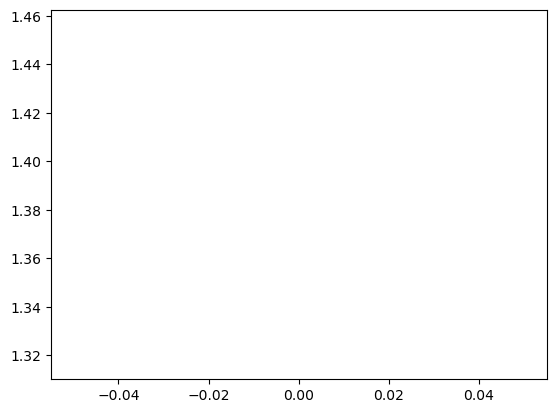

In [92]:
plt.plot(list(range(len(losses))), losses)
plt.show()

In [55]:
import torch

# Example tensor (simulating a loss value)
loss_tensor = torch.tensor([0.5, 1.2, 0.8], device='cpu')  # or device='cuda' if using a GPU

# List of tensors
losses = [loss_tensor, loss_tensor]

# Checking device before conversion to numpy
for loss_tensor in losses:
    print(f"Device before conversion: {loss_tensor.device}")

    # Now convert to NumPy
    numpy_loss = loss_tensor.cpu().detach().numpy()  # move to CPU, detach from graph, convert to NumPy
    print(f"Converted NumPy array: {numpy_loss}")
    print("-" * 50)


Device before conversion: cpu
Converted NumPy array: [0.5 1.2 0.8]
--------------------------------------------------
Device before conversion: cpu
Converted NumPy array: [0.5 1.2 0.8]
--------------------------------------------------


In [56]:
# Assuming the tensor is on some device, we can track the device before conversion
device_info = [loss_tensor.device for loss_tensor in losses]  # Storing device info

# Convert to NumPy arrays
numpy_losses = [loss_tensor.cpu().detach().numpy() for loss_tensor in losses]

# Now you can use `device_info` to check where the original tensor was
for i, numpy_loss in enumerate(numpy_losses):
    print(f"Loss {i}: NumPy array: {numpy_loss}")
    print(f"Device before conversion: {device_info[i]}")


Loss 0: NumPy array: [0.5 1.2 0.8]
Device before conversion: cpu
Loss 1: NumPy array: [0.5 1.2 0.8]
Device before conversion: cpu


In [34]:
losses = list(map(lambda x: x.cpu().detach().numpy(), losses))

AttributeError: 'numpy.ndarray' object has no attribute 'cpu'

In [35]:
# Check if tensor is on CPU
for loss_tensor in losses:
    print(loss_tensor.device)  # This will print 'cpu' if it's on the CPU


AttributeError: 'numpy.ndarray' object has no attribute 'device'

In [39]:
print(losses)


[tensor([0.5000, 1.2000, 0.8000]), tensor([0.5000, 1.2000, 0.8000])]


/opt/homebrew/Caskroom/miniconda/base/envs/ds4003/lib/python3.8/site-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

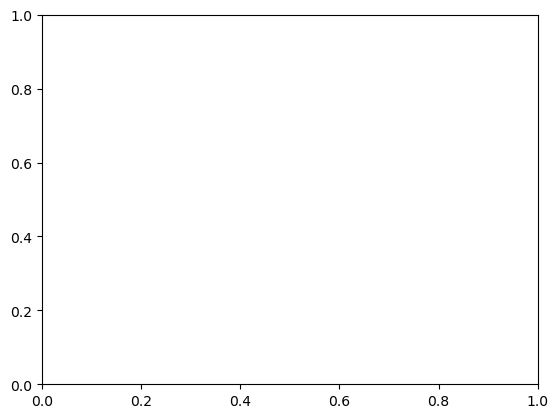

In [38]:
plt.plot(list(range(len(losses))), losses)
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

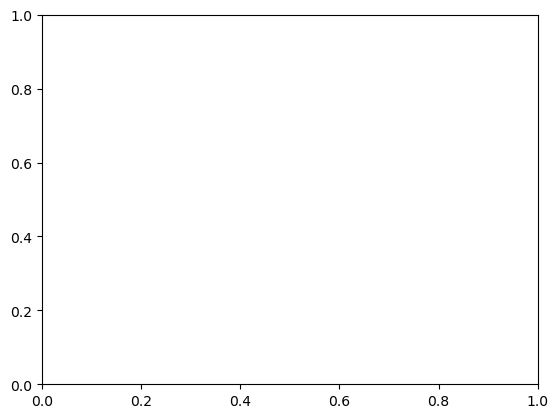

In [40]:
# After the training loop is done, plot the losses
plt.plot(list(range(len(losses))), losses)
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.title('Training Loss per Batch')
plt.show()


In [78]:
img = df['Image_Data'][0]  # Access image data (PIL Image)
img.show()

AttributeError: 'numpy.ndarray' object has no attribute 'show'

In [13]:
train, test = train_test_split(df,test_size=0.8,stratify=df['Impairment_Type'])

NameError: name 'df' is not defined

In [49]:
print(train)

           Impairment_Type                                         Image_Name  \
2622  Very Mild Impairment  VeryMildImpairment-118-_jpg.rf.55e10430534418a...   
166    Moderate Impairment  ModerateImpairment-1206-_jpg.rf.e7773858f5509c...   
6988         No Impairment  NoImpairment-791-_jpg.rf.e0439b33568ccd046c790...   
7140         No Impairment  NoImpairment-1024-_jpg.rf.99fb6886424e09711f9a...   
1332   Moderate Impairment  ModerateImpairment-1540-_jpg.rf.988a0e7321c60d...   
...                    ...                                                ...   
9583         No Impairment  16-54-_jpg.rf.3d3f419495c9df10d92f4b58c0e9cf59...   
2584  Very Mild Impairment  VeryMildImpairment-1284-_jpg.rf.07ad1bc2959b91...   
1353   Moderate Impairment  ModerateImpairment-2305-_jpg.rf.53ab084d6a4529...   
5731       Mild Impairment  MildImpairment-1058-_jpg.rf.d1fefcc31f0f6c197a...   
4109  Very Mild Impairment  VeryMildImpairment-2526-_jpg.rf.52de600b1b0fa7...   

                           

In [52]:
import plotly.express as px 

fig = px.bar(train, x = 'Impairment_Type')
fig.show()

fig = px.bar(test, x = 'Impairment_Type')
fig.show()

In [ ]:
import os
import pandas as pd
from PIL import Image
import io
from google.colab import drive

# Mount Google Drive to access the files
drive.mount('/content/drive')

def create_image_dataframe(base_dir):
    # List to hold the rows of the dataframe
    data = []
    
    # Loop over the 'train' and 'test' directories
    for split in ['train', 'test']:
        split_dir = os.path.join(base_dir, split)
        
        # Check if the split directory exists
        if not os.path.isdir(split_dir):
            print(f"Directory not found: {split_dir}")
            continue
        
        # Iterate over each impairment type directory within train/test
        for impairment_type in ['Moderate Impairment', 'Very Mild Impairment', 'Mild Impairment']:
            impairment_dir = os.path.join(split_dir, impairment_type)

            for img_name in os.listdir(impairment_dir):
                if img_name.lower().endswith('.jpg'):
                    # Full image path
                    img_path = os.path.join(impairment_dir, img_name)
                    
                    # Open the image and load it into memory as an object
                    with open(img_path, 'rb') as img_file:
                        img_data = img_file.read()  # Read the image file as bytes
                        img = Image.open(io.BytesIO(img_data))  # Open the image using Pillow
                    
                    # Append a new row with impairment type, image name, image path, and image data
                    data.append([impairment_type, img_name, img_path, img])  

    # Convert the list of data into a pandas DataFrame
    df = pd.DataFrame(data, columns=['Impairment_Type', 'Image_Name', 'Image_Path', 'Image_Data'])
    return df

# Define your base directory where 'train' and 'test' folders are located in Google Drive
base_dir = '/content/drive/MyDrive/alzheimer_detection'  # Update path to reflect your Drive structure

# Generate the dataframe
df = create_image_dataframe(base_dir)

# Display the first few rows
print(df.head())
df.info()


In [ ]:
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify= y=y)

In [55]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 MB 18.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 26.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 25.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [56]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision import models

ModuleNotFoundError: No module named 'torchvision'

In [ ]:
#CBAM module